# Diabetes prediction using XtremeGradient Boosting

**Importing necessary modules**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [55]:
data= pd.read_csv('diabetes.csv')
df= pd.DataFrame(data)

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**checking for nan values and duplicated columns**

In [56]:
print(df.isna().sum())
df.duplicated().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


np.int64(0)

**checking for any irregular data type**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**initializing features and target variables and splitting them**

In [58]:
x= df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]
y= df['Outcome']

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=42)

**selecting xgboost model and running the predictions by tuning the hyperparameters**

In [59]:
model= xgb.XGBClassifier()

param_grid={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[2,3,4,5],
    'learning_rate':[0.001,0.01,0.05,0.1],
    'eval_metric':['logloss']
}

cv_scores= GridSearchCV(model,param_grid,cv=5, scoring='accuracy')
cv_scores.fit(X_train,y_train)

print("best params:", cv_scores.best_params_)
print("best CV score:", cv_scores.best_score_)

best_params= cv_scores.best_estimator_
best_y_pred= best_params.predict(X_test)

accuracy= accuracy_score(y_test,best_y_pred)

print(f'final accuracy: {accuracy}')


best params: {'eval_metric': 'logloss', 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 400}
best CV score: 0.7817939490870318
final accuracy: 0.7792207792207793


Test AUC: 0.8168962350780533


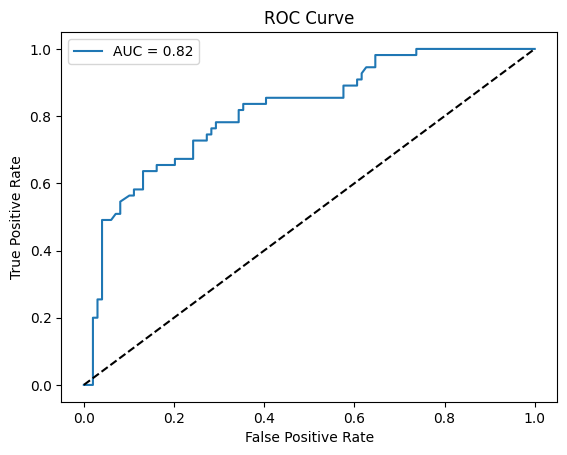

In [60]:
y_probs= best_params.predict_proba(X_test)[:,1]

tpr,fpr,thresholds= roc_curve(y_test,y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print("Test AUC:", auc_score)

plt.plot(tpr, fpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


